In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Resources/tsunami.csv")

### Isolate Last 100 Years ⌚️
---

In [3]:
previous_100 = df[df['Year'] >= 1921]

In [4]:
previous_100.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
1002,1921.0,5.0,14.0,11.0,17.0,45.0,2.0,1.0,6.2,0.0,...,NaN,0.5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1003,1921.0,8.0,4.0,NaN,NaN,NaN,3.0,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1004,1921.0,9.0,11.0,4.0,1.0,38.0,4.0,1.0,7.5,0.0,...,-2.3,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,1921.0,11.0,11.0,18.0,36.0,8.0,3.0,1.0,7.5,0.0,...,0.5,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1006,1921.0,12.0,16.0,NaN,NaN,NaN,-1.0,9.0,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping Columns 😽😽😽

In [5]:
columns_drop = ['Mo', 'Dy', 'Hr', 'Mn', 'Sec']
previous_100.drop(columns_drop, axis =1 , inplace = True)

In [6]:
previous_100.isnull().sum().sort_values(ascending = False)

Total Missing                1151
Total Missing Description    1150
Total Houses Damaged         1091
Total Damage ($Mil)          1026
Total Houses Destroyed       1019
Total Injuries                908
Total Deaths                  819
Tsunami Magnitude (Iida)      775
Tsunami Intensity             745
Total Damage Description      608
Maximum Water Height (m)      318
Earthquake Magnitude          260
Latitude                       64
Longitude                      64
Year                            0
Tsunami Event Validity          0
Location Name                   0
Country                         0
Deposits                        0
Tsunami Cause Code              0
Number of Runups                0
dtype: int64

In [7]:
too_many_nulls = ['Total Missing', 'Total Missing Description', 'Total Houses Damaged',
                 'Total Damage ($Mil)', 'Total Houses Destroyed', 'Total Damage Description']

previous_100.drop(too_many_nulls, axis = 1, inplace = True)

***Drop all columns that have many non-nulls***

* Total Missing
* Total Missing Description
* Total Houses Damaged
* Total Damaged ($Mil)
* Total Damage Description - Can't analyze String, unless someone is a NPL (natural language processising) expert

### Must have coordinates 

In [8]:
previous_100 = previous_100[previous_100['Latitude'].notnull()]

### Replace Nulls with Column Mean 
---

If nulls is not significant, can replace with mean of non-nulls.

In [9]:
previous_100.isnull().sum().sort_values()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Number of Runups              0
Earthquake Magnitude        198
Maximum Water Height (m)    286
Tsunami Intensity           690
Tsunami Magnitude (Iida)    716
Total Deaths                763
Total Injuries              850
dtype: int64

In [10]:
# Fill Low Na Columns with Mean 
previous_100['Earthquake Magnitude'] = previous_100['Earthquake Magnitude'].fillna(previous_100['Earthquake Magnitude'].mean())
previous_100['Maximum Water Height (m)'] = previous_100['Maximum Water Height (m)'].fillna(previous_100['Maximum Water Height (m)'].mean())

## Key Columns 🔑🔑🔑

1) Water Height  
2) Tsunami Intensity vs. Magnitude (Intensity v. Magnitude Ratio)  
3) Total Deaths  
4) Earthquake Magnitude


Since the key columns we want also have the most nulls, we are likely forced to delete rows with nulls.

In [12]:
intensity = previous_100[previous_100['Tsunami Intensity'].notnull()]

In [14]:
intensity.isnull().sum()

Year                          0
Tsunami Event Validity        0
Tsunami Cause Code            0
Earthquake Magnitude          0
Deposits                      0
Country                       0
Location Name                 0
Latitude                      0
Longitude                     0
Maximum Water Height (m)      0
Number of Runups              0
Tsunami Magnitude (Iida)    139
Tsunami Intensity             0
Total Deaths                259
Total Injuries              306
dtype: int64

In [16]:
# Fill magnitude with mean, close enough 
intensity['Tsunami Magnitude (Iida)'] = intensity['Tsunami Magnitude (Iida)'].fillna(intensity['Tsunami Magnitude (Iida)'].mean())

1) Assume that the rest have zero death or injuries, we can fact check this but for the sake of the assignment, I would suggest 0, better than dropping or putting unknown 

In [18]:
# Fill rest with zero
intensity = intensity.fillna(0)

## Distribution of Year
---

Looks like despite focusing on Intensity the year is more or less well distributed.. good nuff

(array([59., 38., 38., 42., 42., 63., 44., 18., 22., 40.]),
 array([1921. , 1929.2, 1937.4, 1945.6, 1953.8, 1962. , 1970.2, 1978.4,
        1986.6, 1994.8, 2003. ]),
 <BarContainer object of 10 artists>)

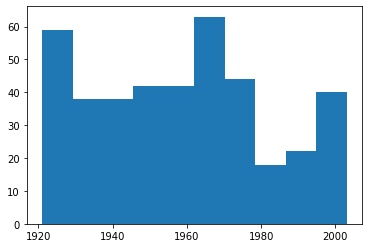

In [15]:
import matplotlib.pyplot as plt

plt.hist(intensity['Year'])

## Data Exploration 

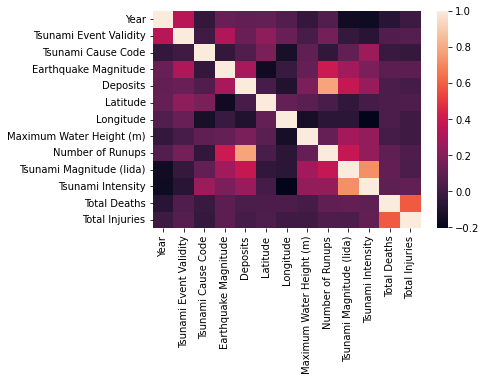

In [21]:
import seaborn as sns 

sns.heatmap(intensity.corr())
plt.show()

* Looks like not a lot of colinearity - except for Deposits/Runups, Total Death/Injuries, and Magnitude v. Intensity

*Feature Engineering*
** Ratios ** Magnitude/Intensity or Death/Injries or Despoite/Runups 

In [25]:
intensity.describe()

,Year,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Injuries
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,1958.270936,3.295567,1.736453,7.054944,0.450739,20.297719,62.213133,5.827860,21.709360,0.197228,0.520345,575.115764,684.544335
std,23.074233,1.116135,1.950499,0.747188,2.220285,27.005454,106.761600,27.443930,84.631543,1.883445,2.022479,7302.794732,5920.489946
min,1921.000000,-1.000000,0.000000,4.300000,0.000000,-63.000000,-177.632000,0.030000,0.000000,-4.640000,-4.140000,0.000000,0.000000
25%,1938.000000,3.000000,1.000000,6.700000,0.000000,-3.290000,1.924000,0.400000,1.000000,-0.700000,-1.000000,0.000000,0.000000
50%,1960.000000,4.000000,1.000000,7.007684,0.000000,32.150000,124.070000,2.000000,2.000000,0.197228,0.500000,0.000000,0.000000
75%,1974.750000,4.000000,1.000000,7.600000,0.000000,40.627500,143.175000,5.989469,9.000000,1.000000,2.000000,6.750000,0.000000
max,2003.000000,4.000000,9.000000,9.500000,26.000000,69.817000,178.870000,524.600000,1277.000000,6.100000,9.000000,142807.000000,100000.000000


### Tsunami Cause Code
---

0	Unknown  
1	Earthquake  
2	Questionable Earthquake  
3	Earthquake and Landslide  
4	Volcano and Earthquake  
5	Volcano, Earthquake, and Landslide  
6	Volcano   
7	Volcano and Landslide  
8	Landslide  
9	Meteorological  
10	Explosion  
11	Astronomical Tide  